### **Week 3**

**DATASET** <br>
*   Download the **MBA dataset** from Elearn
*   Upload the dataset to your own Github
*   Import the dataset using URL from your Github


<br>

**METADATA** <br>
application_id: Unique identifier for each application <br>
gender: Applicant's gender (Male, Female)<br>
international: International student (TRUE/FALSE)<br>
gpa: Grade Point Average of the applicant (on 4.0 scale)<br>
major: Undergraduate major (Business, STEM, Humanities)<br>
race: Racial background of the applicant (e.g., White, Black, Asian, Hispanic, Other / null: international student)<br>
gmat: GMAT score of the applicant (800 points)<br>
work_exp: Number of years of work experience (Year)<br>
work_industry: Industry of the applicant's previous work experience (e.g., Consulting, Finance, Technology, etc.)<br>
admission: Admission status (Admit, Waitlist, Null: Deny)<br>

In [1]:
#Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder


1. display 5 columns from dataset

In [2]:
#1
df = pd.read_csv(r'https://raw.githubusercontent.com/cvinnn/Data-Mining/refs/heads/main/MBA.csv')
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


2. display the info column and conclude what the insight is from that column

In [3]:
#2
df.info()
#conclusion
# bool(1), float64(3), int64(1), object(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


3. display the number of each unique value in the race and admission columns (including NaN)

In [4]:
#3a
admission_counts = df['admission'].value_counts(dropna=False)
print(admission_counts)

admission
NaN         5194
Admit        900
Waitlist     100
Name: count, dtype: int64


In [5]:
#3b
race_counts = df['race'].value_counts(dropna=False)
print(race_counts)

race
NaN         1842
White       1456
Asian       1147
Black        916
Hispanic     596
Other        237
Name: count, dtype: int64


4. fill NaN values in admission column to "deny" and null values in in race column to "other"

In [6]:
#4
df['admission'] = df['admission'].fillna('deny')

df['race'] = df['race'].fillna('other')

5. recheck missing value

In [7]:
#5
df.isnull().sum()

application_id    0
gender            0
international     0
gpa               0
major             0
race              0
gmat              0
work_exp          0
work_industry     0
admission         0
dtype: int64

6. drop application_id column

In [8]:
# 6
df = df.drop(columns=['application_id'])

7. show describe column and conclude what the insight is from that column

In [9]:
#7
df.describe()
#conclusion


,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000
mean,3.250714,651.092993,5.016952
std,0.151541,49.294883,1.032432
min,2.650000,570.000000,1.000000
25%,3.150000,610.000000,4.000000
50%,3.250000,650.000000,5.000000
75%,3.350000,680.000000,6.000000
max,3.770000,780.000000,9.000000


8. make a visualization to analyze admission status based on major and explain the conclusions

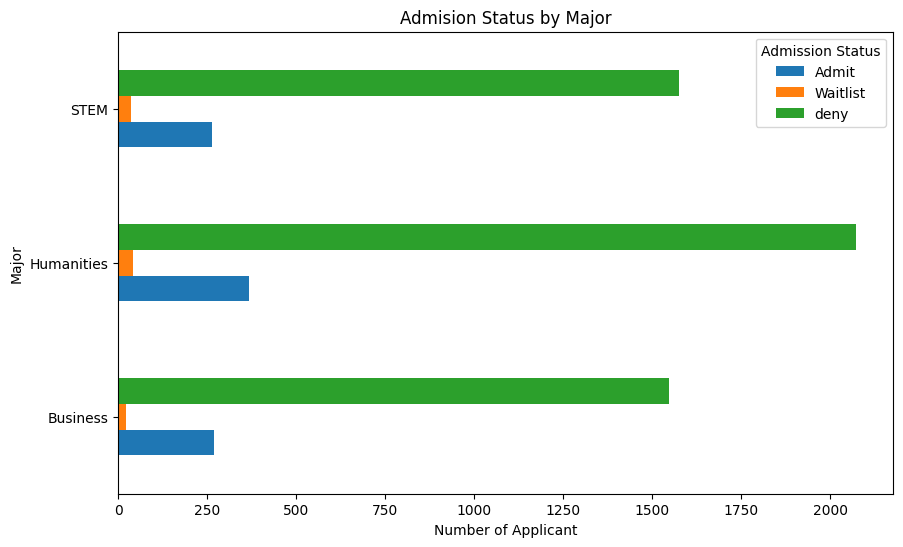

In [10]:
#8

# Group data by major and admission status, then count the occurrences
gd = df.groupby(['major', 'admission'])['admission'].count().unstack()

# Create a horizontal bar chart
gd.plot (kind='barh', figsize=(10,6))

# Customize the chart
plt.title('Admision Status by Major')
plt.xlabel('Number of Applicant')
plt.ylabel('Major')
plt.legend(title='Admission Status')

# Show the chart
plt.show()

9. make a visualization to analyze the admissions in each major based on gender and explain the conclusions

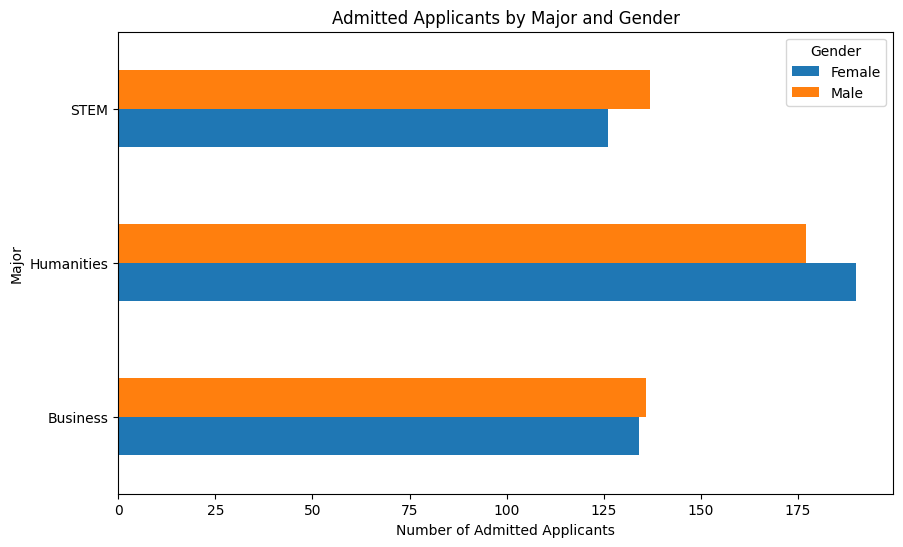

In [11]:
#9

# Filter the DataFrame to include only admitted applicants
admited = df[df['admission'] == 'Admit']

# Group data by major and gender, then count the occurrences
gd = admited.groupby(['major', 'gender'])['gender'].count().unstack()

# Create a horizontal bar chart
gd.plot (kind='barh', figsize=(10,6))

# Customize the chart
plt.title('Admitted Applicants by Major and Gender')
plt.xlabel('Number of Admitted Applicants')
plt.ylabel('Major')
plt.legend(title='Gender')

# Show the chart
plt.show()

10. create your own insightful visualization and explain it in at least 2 sentences

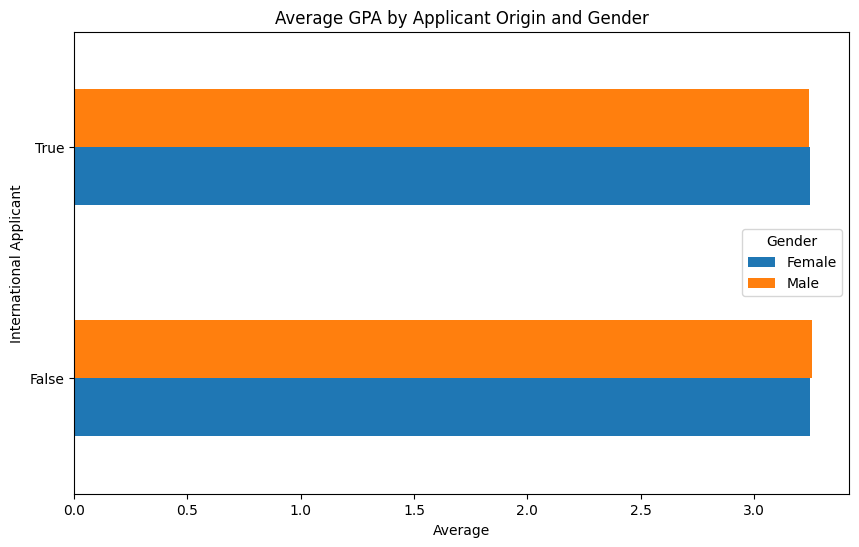

this explaining to count average GPA by the student type and gender. and it show us that male Local Applicant having higher gpa than International Applicant but female International Applicant having higher gpa than Local Applicant


In [12]:
#10
df['gpa'] = pd.to_numeric(df['gpa'], errors='coerce')

avg_gpa = df.groupby(['international', 'gender'])['gpa'].mean().unstack()

avg_gpa.plot (kind='barh', figsize=(10,6))

# Customize the chart
plt.title('Average GPA by Applicant Origin and Gender')
plt.xlabel('Average')
plt.ylabel('International Applicant')
plt.legend(title='Gender')

# Show the chart
plt.show()

print("this explaining to count average GPA by the student type and gender. and it show us that male Local Applicant having higher gpa than International Applicant but female International Applicant having higher gpa than Local Applicant")


11. create your own insightful visualization and explain it in at least 2 sentences

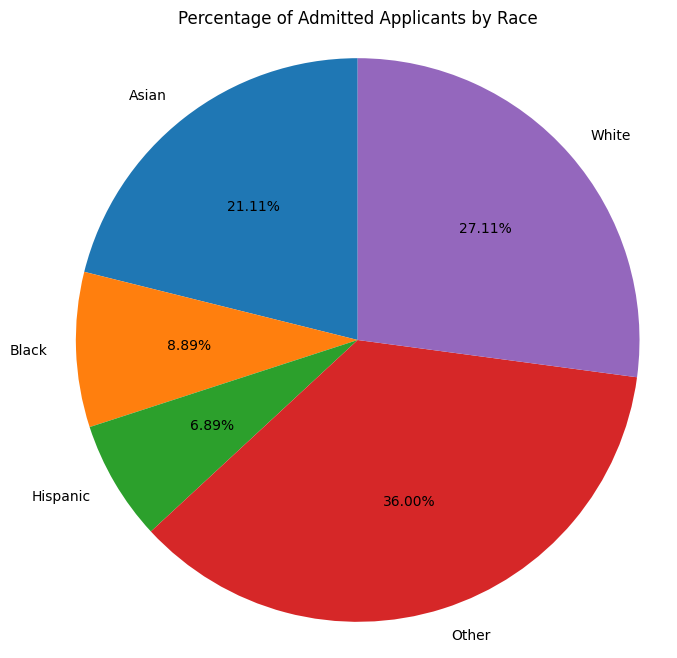

this pie chart explaining Percentage of Admitted Applicants by Race. which we can see white people dominating other applicant race by 27.11% and the second one is asian by 21.11%


In [13]:
#11
df['race'] = df['race'].replace("other", "Other")
admitted_df = df[df['admission'] == 'Admit']
gd = admitted_df.groupby("race")["race"].count()

plt.figure(figsize=(8, 8))
gd.plot(kind='pie', autopct='%1.2f%%', title='Percentage of Admitted Applicants by Race', startangle=90)
plt.ylabel('')
plt.axis('equal')

# Show the chart
plt.show()

print("this pie chart explaining Percentage of Admitted Applicants by Race. which we can see white people dominating other applicant race by 27.11% and the second one is asian by 21.11%")

12. encode categorical columns and display the results

In [14]:
#12
df_encode = df
df_encode['race'] = df_encode['race'].replace("other", "Other")

label_encoders = {}

for column in ['gender', 'international', 'major', 'race', 'work_industry']:
    le = LabelEncoder()
    df_encode[column] = le.fit_transform(df_encode[column])
    label_encoders[column] = le
    
df_encode.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,3.0,3,Admit
1,1,0,3.28,1,1,680.0,5.0,6,deny
2,0,1,3.30,0,3,710.0,5.0,13,Admit
3,1,0,3.47,2,1,690.0,6.0,13,deny
4,1,0,3.35,2,2,590.0,5.0,1,deny


In [15]:
# Encode the admission column
label_encoders = {}

for column in ['admission']:
    le = LabelEncoder()
    df_encode[column] = le.fit_transform(df_encode[column])
    label_encoders[column] = le
    
df_encode.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,3.0,3,0
1,1,0,3.28,1,1,680.0,5.0,6,2
2,0,1,3.30,0,3,710.0,5.0,13,0
3,1,0,3.47,2,1,690.0,6.0,13,2
4,1,0,3.35,2,2,590.0,5.0,1,2


13. create a heatmap to see the correlation and explain the conclusion

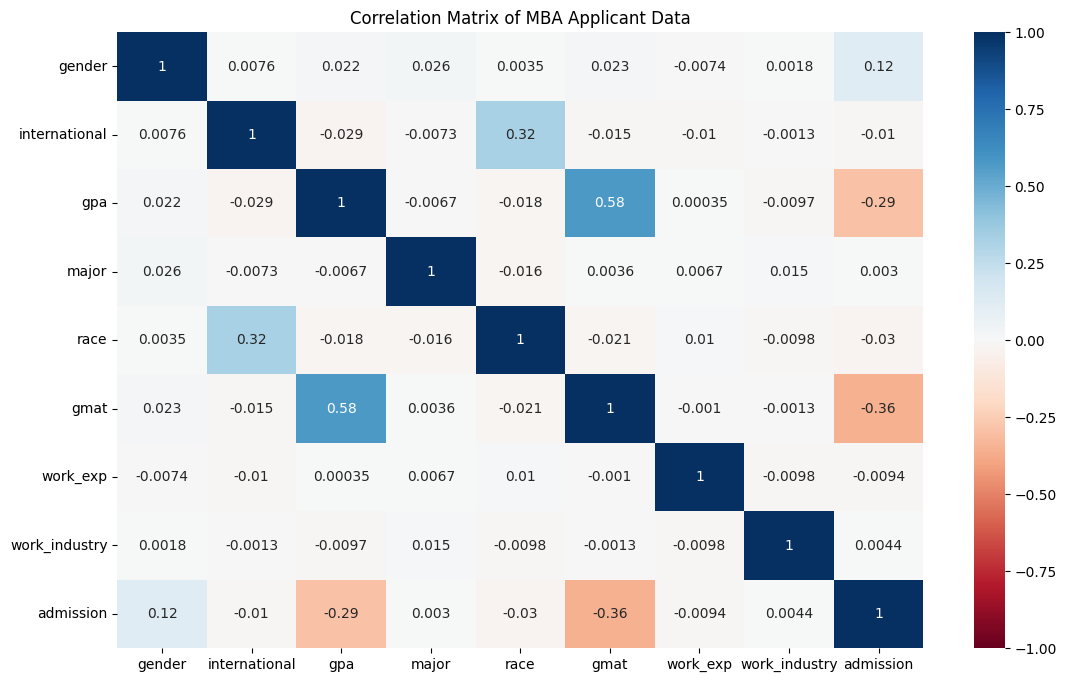

The heatmap will visually represent the correlations between the variables in your DataFrame. You can analyze which features are positively or negatively correlated with each other, aiding in your data analysis and decision-making processes.


In [16]:
#13

# Calculate the correlation matrix
correlation_matrix = df_encode.corr()

# Create a heatmap
plt.figure(figsize=(13,8))
sns.heatmap(df.corr(), cmap='RdBu', vmin=-1, vmax=1, annot=True)
plt.title('Correlation Matrix of MBA Applicant Data')
plt.show()

#Conclusion
print("The heatmap will visually represent the correlations between the variables in your DataFrame. You can analyze which features are positively or negatively correlated with each other, aiding in your data analysis and decision-making processes.")

**Challenge! Get Extra 10 Points**<br>

get extra 10 points if you can help Lisa predict whether she will be accepted or not.
Lisa is a local student, Lisa's gpa is the average of all applicants, during her undergraduate Lisa studied entrepreneurship, Lisa has an Asian race, gmat score 580, has worked from 2018 to 2020 as a finance.

In [17]:
# prompt: make a model classification

# Separate features and target variable
X = df_encode.drop(columns=['admission'])
y = df_encode['admission'] 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)  
accuracy = model.score(X_test, y_test)  

# Evaluate the model
print(f"Model accuracy: {accuracy * 100:.2f}%") 


Model accuracy: 78.77%


In [19]:
# Get the average GPA
average_gpa = df['gpa'].mean()

# Create Lisa's data as a dictionary
lisa_data = {
    'gender': 'Female', 
    'international': 'False', 
    'gpa': average_gpa, 
    'major': 'Entrepreneurship',
    'race': 'Asian',
    'gmat': 580,
    'work_exp': 2,
    'work_industry': 'Finance'
}

# Create a DataFrame with Lisa's data
lisa_df = pd.DataFrame([lisa_data])

# Encode categorical features for Lisa's data
for column in ['gender', 'international', 'major', 'race', 'work_industry']:
    le = LabelEncoder()
    lisa_df[column] = le.fit_transform(lisa_df[column])
    label_encoders[column] = le
        
# Make a prediction using the trained model
lisa_prediction = model.predict(lisa_df)

# Decode the prediction back to the original label
prediction_label = "Admit" if lisa_prediction[0] == "Admit" else "Deny"
print(f'Lisa will be predicted to: {prediction_label}')

Lisa will be predicted to: Deny
